In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [324]:
from sklearn.metrics import mean_absolute_percentage_error

In [325]:
df = pd.read_csv('queues_indervals_timeseries.csv', index_col='datetime', parse_dates=True)

In [326]:
df.head()

,queue,queue_utilization,queue_fullness,queue_efficiency
datetime,,,,
2022-05-15 06:00:00,AGLT2,2.4760,1.0227,0.9822
2022-05-15 06:00:00,AGLT2_VHIMEM,0.8865,4.7605,0.1041
2022-05-15 06:00:00,ANALY_AGLT2_VP,0.8751,1.0975,0.9576
2022-05-15 06:00:00,ANALY_ARNES_DIRECT,1.2000,1.2000,1.0000
2022-05-15 06:00:00,ANALY_BNL_GPU_ARC,0.9524,1.0000,1.0000


In [327]:
df.index = pd.to_datetime(df.index, format='YYYY-MM-DD HH:MI:SS')

In [406]:
aglt2 = df[df['queue'] == 'AGLT2'][['queue_utilization']]

In [407]:
aglt2 = aglt2[aglt2.index >= '2022-05-18']

In [408]:
aglt2['LogUtilization'] = np.log(aglt2['queue_utilization'])

In [409]:
aglt2

,queue_utilization,LogUtilization
datetime,,
2022-06-10 16:00:00,1.9554,0.670595
2022-05-18 04:00:00,0.9377,-0.064325
2022-05-18 10:00:00,1.9585,0.672179
2022-05-18 22:00:00,3.1898,1.159958
2022-05-18 16:00:00,2.3046,0.834907
...,...,...
2022-07-18 10:00:00,0.4247,-0.856372
2022-07-19 10:00:00,3.1486,1.146958
2022-07-18 16:00:00,0.9808,-0.019387


In [410]:
aglt2 = aglt2.sort_index()

In [411]:
aglt2.shape

(250, 2)

In [412]:
aglt2.index

DatetimeIndex(['2022-05-18 04:00:00', '2022-05-18 10:00:00',
               '2022-05-18 16:00:00', '2022-05-18 22:00:00',
               '2022-05-19 04:00:00', '2022-05-19 10:00:00',
               '2022-05-19 16:00:00', '2022-05-19 22:00:00',
               '2022-05-20 04:00:00', '2022-05-20 10:00:00',
               ...
               '2022-07-17 04:00:00', '2022-07-17 10:00:00',
               '2022-07-17 16:00:00', '2022-07-17 22:00:00',
               '2022-07-18 04:00:00', '2022-07-18 10:00:00',
               '2022-07-18 16:00:00', '2022-07-18 22:00:00',
               '2022-07-19 04:00:00', '2022-07-19 10:00:00'],
              dtype='datetime64[ns]', name='datetime', length=250, freq=None)

In [413]:
aglt2 = aglt2.asfreq('6H')

In [414]:
aglt2.tail(20)

,queue_utilization,LogUtilization
datetime,,
2022-07-14 16:00:00,1.1262,0.118849
2022-07-14 22:00:00,1.2344,0.210585
2022-07-15 04:00:00,1.1585,0.147126
2022-07-15 10:00:00,1.4622,0.379942
2022-07-15 16:00:00,2.3236,0.843118
2022-07-15 22:00:00,1.7732,0.572786
2022-07-16 04:00:00,1.2536,0.226019
2022-07-16 10:00:00,0.3770,-0.975510
2022-07-16 16:00:00,0.4530,-0.791863


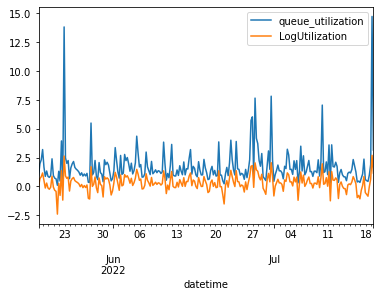

In [415]:
aglt2.plot();

In [436]:
Ntest = 2
train = aglt2.iloc[:-Ntest]
test = aglt2.iloc[-Ntest:]

In [437]:
aglt2.index

DatetimeIndex(['2022-05-18 04:00:00', '2022-05-18 10:00:00',
               '2022-05-18 16:00:00', '2022-05-18 22:00:00',
               '2022-05-19 04:00:00', '2022-05-19 10:00:00',
               '2022-05-19 16:00:00', '2022-05-19 22:00:00',
               '2022-05-20 04:00:00', '2022-05-20 10:00:00',
               ...
               '2022-07-17 04:00:00', '2022-07-17 10:00:00',
               '2022-07-17 16:00:00', '2022-07-17 22:00:00',
               '2022-07-18 04:00:00', '2022-07-18 10:00:00',
               '2022-07-18 16:00:00', '2022-07-18 22:00:00',
               '2022-07-19 04:00:00', '2022-07-19 10:00:00'],
              dtype='datetime64[ns]', name='datetime', length=250, freq='6H')

In [438]:
# boolean series to index df rows
train_idx = aglt2.index <= train.index[-1] # indexes less than the last values of train
test_idx = aglt2.index > train.index[-1] # indexes greater than the last value of train

In [439]:
aglt2['DiffLogUtilization'] = aglt2['LogUtilization'].diff()

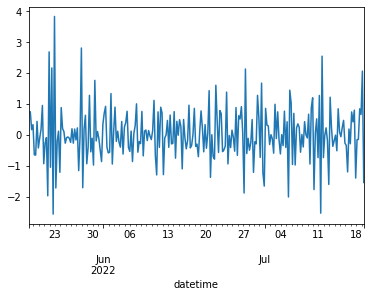

In [440]:
aglt2['DiffLogUtilization'].plot();

In [441]:
df.shape

(77157, 4)

In [442]:
# make supervised dataset

series = aglt2['DiffLogUtilization'].dropna().to_numpy()

T = 10 # number of lags
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (239, 10) Y.shape (239,)


In [443]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [444]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

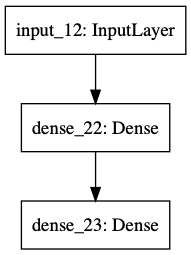

In [445]:
tf.keras.utils.plot_model(model)

In [446]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics='mae'
)

In [447]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest, Ytest)
)

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6535 - mae: 0.6076 - val_loss: 3.5123 - val_mae: 1.7955
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6207 - mae: 0.5927 - val_loss: 3.4931 - val_mae: 1.7806
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5924 - mae: 0.5794 - val_loss: 3.4733 - val_mae: 1.7669
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5716 - mae: 0.5704 - val_loss: 3.4303 - val_mae: 1.7402
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5555 - mae: 0.5627 - val_loss: 3.4338 - val_mae: 1.7240
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5413 - mae: 0.5568 - val_loss: 3.4444 - val_mae: 1.7089
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5290 - mae: 0.5522 - val_loss: 3.4649 - val_mae: 1.6947
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5168 - mae: 0.5471 - va

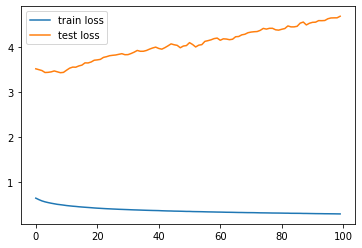

In [448]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [449]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [450]:
Ptrain = model.predict(Xtrain).flatten() # turn to 1D array
Ptest = model.predict(Xtest).flatten()

In [451]:
# Store diff predictions
aglt2.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
aglt2.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [452]:
Ptest

array([-0.96222204, -2.0373476 ], dtype=float32)

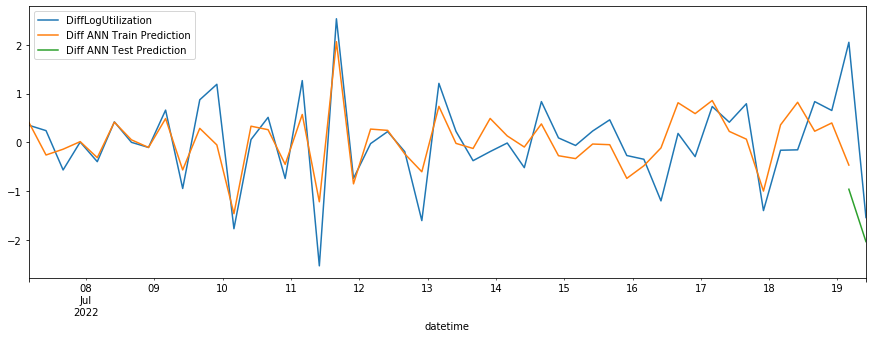

In [453]:
cols = ['DiffLogUtilization',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
aglt2[cols].tail(50).plot(figsize=(15,5));

In [454]:
# Needed to compute un-differenced predictions
aglt2['ShiftLogUtilization'] = aglt2['LogUtilization'].shift(1)
prev = aglt2['ShiftLogUtilization']

In [455]:
# Last-known train value
last_train = train.iloc[-1]['LogUtilization']

In [456]:
# 1-step forecast
aglt2.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
aglt2.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

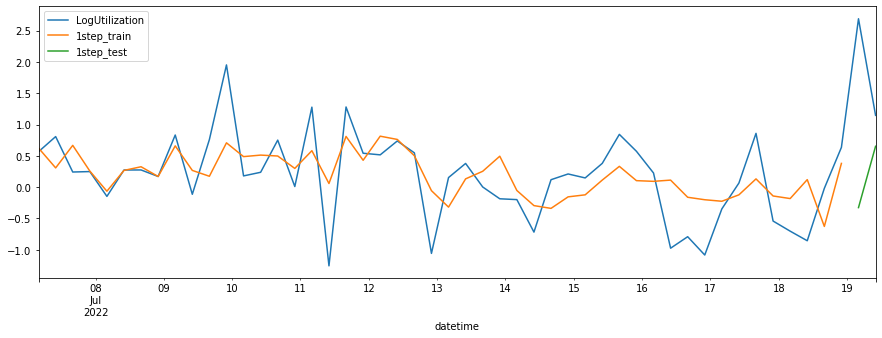

In [457]:
# plot 1-step forecast
aglt2[['LogUtilization', '1step_train', '1step_test']].tail(50).plot(figsize=(15,5));

In [458]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1,-1))[0]

    # update the predictions list
    multistep_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

In [459]:
# save multistep forecast to dataframe
aglt2.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

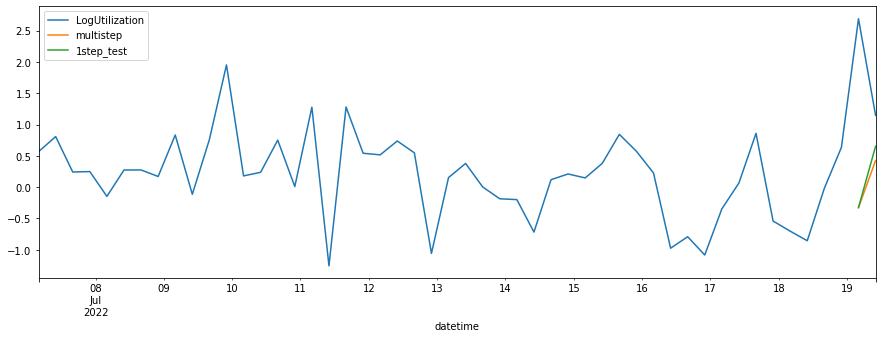

In [460]:
cols = ['LogUtilization', 'multistep', '1step_test']
aglt2[cols].tail(50).plot(figsize=(15,5));

In [461]:
# make multi-output supervised dataset
Tx = T # number of step in the input
Ty = Ntest # number of steps in the output
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
    x = series[t:t+Tx]
    X.append(x)
    y = series[t+Tx:t+Tx+Ty]
    Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (238, 10) Y.shape (238, 2)


In [462]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [463]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i,x)

In [464]:
model.compile(
    loss='mse',
    optimizer='adam'
)

In [465]:
r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs=100,
    validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 1.0227 - val_loss: 4.1326
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9593 - val_loss: 4.2348
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9106 - val_loss: 4.3367
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8739 - val_loss: 4.4116
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8416 - val_loss: 4.4810
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8171 - val_loss: 4.5161
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7949 - val_loss: 4.5545
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7759 - val_loss: 4.5470
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7608 - val_loss: 4.5233
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7462 - val_loss: 4.5361
Epoch 11/100
8/8 [==========

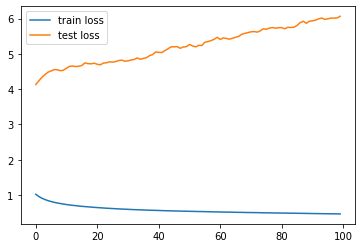

In [466]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [467]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

In [468]:
Ptrain.shape, Ptest.shape

((237, 2), (1, 2))

In [469]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [470]:
# save multi-output forecast to dataframe
aglt2.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

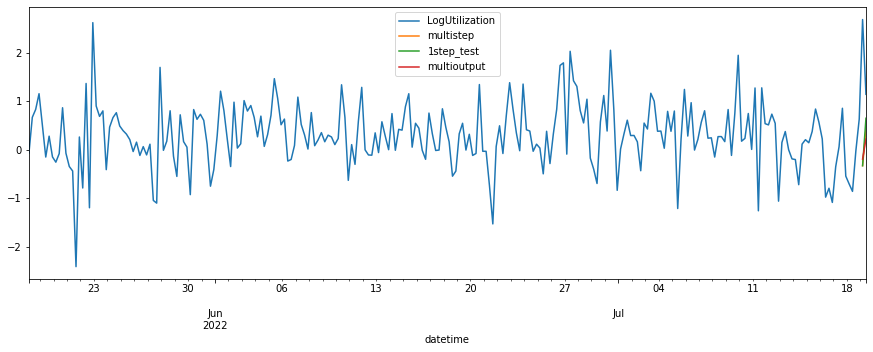

In [471]:
# plot all forecasts
cols = ['LogUtilization','multistep','1step_test','multioutput']
aglt2[cols].plot(figsize=(15,5));

In [378]:
# MAPE
test_log_loss = aglt2.iloc[-Ntest:]['LogUtilization']
mape1 = mean_absolute_percentage_error(test_log_loss, aglt2.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)

mape2 = mean_absolute_percentage_error(test_log_loss, aglt2.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.08480339397962101
multi-output MAPE: 0.03813645078225419
